# Beginnig EDA on Flight Data

#### Before we start, here is the Data dictionary for all columns:

_The data set contains the following columns:_

- **MONTH:** Month
- **DAY_OF_WEEK:** Day of Week
- **DEP_DEL15:** Binary of a departure delay over 15 minutes (1 is yes)
- **DEP_DELAY_NEW:** Departure delay in minutes
- **DEP_TIME_BLK:** Departure time block
- **DISTANCE:** Flight Distance in miles
- **DISTANCE_GROUP:** Distance group to be flown by departing aircraft
- **SEGMENT_NUMBER:** The segment that this tail number is on for the day
- **CONCURRENT_FLIGHTS:** Concurrent flights leaving from the airport in the same departure block
- **NUMBER_OF_SEATS:** Number of seats on the aircraft
- **CARRIER_NAME:** Carrier
- **AIRPORT_FLIGHTS_MONTH:** Avg Airport Flights per Month
- **AIRLINE_FLIGHTS_MONTH:** Avg Airline Flights per Month
- **AIRLINE_AIRPORT_FLIGHTS_MONTH:** Avg Flights per month for Airline AND Airport
- **AVG_MONTHLY_PASS_AIRPORT:** Avg Passengers for the departing airport for the month
- **AVG_MONTHLY_PASS_AIRLINE:** Avg Passengers for airline for month
- **FLT_ATTENDANTS_PER_PASS:** Flight attendants per passenger for airline
- **GROUND_SERV_PER_PASS:** Ground service employees (service desk) per passenger for airline
- **PLANE_AGE:** Age of departing aircraft
- **DEPARTING_AIRPORT:** Departing Airport
- **LATITUDE:** Latitude of departing airport
- **LONGITUDE:** Longitude of departing airport
- **PREVIOUS_AIRPORT:** Previous airport that aircraft departed from
- **PRCP:** Inches of precipitation for day
- **SNOW:** Inches of snowfall for day
- **SNWD:** Inches of snow on ground for day
- **TMAX:** Max temperature for day
- **AWND:** Max wind speed for day

### Newly Added Features:

- **"Delay Category":**  TARGET departure delay of 3 buckets - NO delay, less than 15 minutes, greater than 15 minutes
- **"PRECIPITATION_DEPARTING_AIRPORT_AVG":**  Average precipitation for each departing airport
- **"PRECIPITATION_DEPARTING_AIRPORT_RELATIVE":** Relative average precipitation for each departing airport

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

In order to read this csv, you will need to unzip the _flights_filtered.7z_ file located in the GitHub repository.

In [2]:
df = pd.read_csv('flights_filtered.csv')

In [3]:
df.shape

(6489062, 28)

In [4]:
df.head()

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW  DEP_DEL15 DEP_TIME_BLK  DISTANCE  \
0      1            7            0.0          0    0800-0859     258.0   
1      1            7            0.0          0    0700-0759    1747.0   
2      1            7            0.0          0    0600-0659    1747.0   
3      1            7            0.0          0    0600-0659    2248.0   
4      1            7            0.0          0    0001-0559    1514.0   

   DISTANCE_GROUP  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  ...  \
0               2               1                  25              143  ...   
1               7               1                  29              191  ...   
2               7               1                  27              199  ...   
3               9               1                  27              180  ...   
4               7               1                  10              182  ...   

  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  LONGITUDE  PREVIOUS_AIRPORT  \
0         8  McCarran International     36.08   -115.152              NONE   
1         3  McCarran International     36.08   -115.152              NONE   
2        18  McCarran International     36.08   -115.152              NONE   
3         2  McCarran International     36.08   -115.152              NONE   
4         1  McCarran International     36.08   -115.152              NONE   

   PRCP  SNOW  SNWD  TMAX  AWND  
0   0.0   0.0   0.0  65.0  2.91  
1   0.0   0.0   0.0  65.0  2.91  
2   0.0   0.0   0.0  65.0  2.91  
3   0.0   0.0   0.0  65.0  2.91  
4   0.0   0.0   0.0  65.0  2.91  

[5 rows x 28 columns]

In [16]:
df.tail()

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW  DEP_DEL15 DEP_TIME_BLK  DISTANCE  \
6489057     12            7            0.0          0    2300-2359     102.0   
6489058     12            7            0.0          0    1800-1859     102.0   
6489059     12            7            0.0          0    2000-2059     102.0   
6489060     12            7            0.0          0    2100-2159     102.0   
6489061     12            7           16.0          1    2100-2159     102.0   

         DISTANCE_GROUP  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
6489057               1              11                   3              123   
6489058               1              11                   2              123   
6489059               1              11                   2              123   
6489060               1              12                   3              123   
6489061               1              12                   3              123   

         ... PLANE_AGE  DEPARTING_AIRPORT  LATITUDE  LONGITUDE  \
6489057  ...        18      Lihue Airport    21.979   -159.346   
6489058  ...        16      Lihue Airport    21.979   -159.346   
6489059  ...        18      Lihue Airport    21.979   -159.346   
6489060  ...        18      Lihue Airport    21.979   -159.346   
6489061  ...        15      Lihue Airport    21.979   -159.346   

               PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX   AWND  
6489057  Honolulu International  0.06   0.0   0.0  84.0  15.21  
6489058  Honolulu International  0.06   0.0   0.0  84.0  15.21  
6489059  Honolulu International  0.06   0.0   0.0  84.0  15.21  
6489060  Honolulu International  0.06   0.0   0.0  84.0  15.21  
6489061  Honolulu International  0.06   0.0   0.0  84.0  15.21  

[5 rows x 28 columns]

In [17]:
middle_50_rows = df.iloc[int(len(df) / 2) - 10: int(len(df) / 2) + 10]
middle_50_rows

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW  DEP_DEL15 DEP_TIME_BLK  DISTANCE  \
3244521      7            4           11.0          0    1600-1659     337.0   
3244522      7            4            2.0          0    1600-1659    1038.0   
3244523      7            4           56.0          1    1800-1859     641.0   
3244524      7            4            3.0          0    1700-1759     861.0   
3244525      7            4           14.0          0    1500-1559     861.0   
3244526      7            4           36.0          1    1800-1859     212.0   
3244527      7            4          103.0          1    2000-2059     550.0   
3244528      7            4          136.0          1    1800-1859     875.0   
3244529      7            4           91.0          1    1300-1359     980.0   
3244530      7            4           18.0          1    2100-2159     951.0   
3244531      7            4          131.0          1    1500-1559     814.0   
3244532      7            4            0.0          0    1800-1859     196.0   
3244533      7            4           45.0          1    1900-1959     666.0   
3244534      7            4            4.0          0    1600-1659     666.0   
3244535      7            4            0.0          0    1600-1659    1336.0   
3244536      7            4           27.0          1    1700-1759     268.0   
3244537      7            4           34.0          1    1700-1759    2402.0   
3244538      7            4            0.0          0    1300-1359     268.0   
3244539      7            4            0.0          0    1300-1359     280.0   
3244540      7            4           25.0          1    2100-2159    2176.0   

         DISTANCE_GROUP  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
3244521               2               4                  15              186   
3244522               5               4                  15              150   
3244523               3               4                  21               50   
3244524               4               4                  22              230   
3244525               4               4                  27              187   
3244526               1               4                  21               70   
3244527               3               4                   8               90   
3244528               4               4                  21              128   
3244529               4               4                  14               99   
3244530               4               4                   4              187   
3244531               4               4                  27               90   
3244532               1               4                  21              128   
3244533               3               4                   9              150   
3244534               3               4                  15              143   
3244535               6               4                  15              143   
3244536               2               4                  22               99   
3244537              10               4                  22              187   
3244538               2               4                  14               99   
3244539               2               4                  14              100   
3244540               9               5                   4              186   

         ... PLANE_AGE           DEPARTING_AIRPORT  LATITUDE  LONGITUDE  \
3244521  ...         2  Philadelphia International    39.868    -75.249   
3244522  ...        14  Philadelphia International    39.868    -75.249   
3244523  ...        15  Philadelphia International    39.868    -75.249   
3244524  ...         4  Philadelphia International    39.868    -75.249   
3244525  ...         7  Philadelphia International    39.868    -75.249   
3244526  ...         9  Philadelphia International    39.868    -75.249   
3244527  ...         3  Philadelphia International    39.868    -75.249   
3244528  ...        20  Philadelphia Internatio

#### We will drop the binary target column 'DEP_DEL15', as we will add an additional bucket for prediction using our 'DEP_DELAY_NEW' row. 
</br>

#### We will also only keep one of the distance related variable between DISTANCE and	DISTANCE_GROUP. Choosing to drop DISTANCE_GROUP as we want to keep the continuous variable.

</br>

In [18]:
df.drop('DEP_DEL15', axis=1, inplace=True)

In [19]:
df.drop('DISTANCE_GROUP', axis=1, inplace=True)

In [20]:
df.shape

(6489062, 26)

In [21]:
df.describe()

MONTH   DAY_OF_WEEK  DEP_DELAY_NEW      DISTANCE  \
count  6.489062e+06  6.489062e+06   6.489062e+06  6.489062e+06   
mean   6.607062e+00  3.935598e+00   1.392680e+01  8.374423e+02   
std    3.396853e+00  1.995200e+00   4.611271e+01  6.061086e+02   
min    1.000000e+00  1.000000e+00   0.000000e+00  6.600000e+01   
25%    4.000000e+00  2.000000e+00   0.000000e+00  3.950000e+02   
50%    7.000000e+00  4.000000e+00   0.000000e+00  6.740000e+02   
75%    1.000000e+01  6.000000e+00   7.000000e+00  1.069000e+03   
max    1.200000e+01  7.000000e+00   2.710000e+03  5.095000e+03   

       SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
count    6.489062e+06        6.489062e+06     6.489062e+06   
mean     3.046890e+00        2.783675e+01     1.337397e+02   
std      1.757864e+00        2.151060e+01     4.645213e+01   
min      1.000000e+00        1.000000e+00     4.400000e+01   
25%      2.000000e+00        1.100000e+01     9.000000e+01   
50%      3.000000e+00        2.300000e+01     1.430000e+02   
75%      4.000000e+00        3.900000e+01     1.720000e+02   
max      1.500000e+01        1.090000e+02     3.370000e+02   

       AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
count           6.489062e+06           6.489062e+06   
mean            1.268458e+04           6.296058e+04   
std             8.839796e+03           3.438223e+04   
min             1.100000e+03           5.582000e+03   
25%             5.345000e+03           2.503400e+04   
50%             1.156200e+04           7.087800e+04   
75%             1.761500e+04           8.631200e+04   
max             3.525600e+04           1.177280e+05   

       AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  FLT_ATTENDANTS_PER_PASS  \
count                   6.489062e+06  ...             6.489062e+06   
mean                    3.459251e+03  ...             9.753707e-05   
std                     4.251139e+03  ...             8.644459e-05   
min                     1.000000e+00  ...             0.000000e+00   
25%                     6.540000e+02  ...             3.419267e-05   
50%                     2.251000e+03  ...             6.178236e-05   
75%                     4.806000e+03  ...             1.441659e-04   
max                     2.183700e+04  ...             3.484077e-04   

       GROUND_SERV_PER_PASS     PLANE_AGE      LATITUDE     LONGITUDE  \
count          6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06   
mean           1.355612e-04  1.153211e+01  3.670581e+01 -9.425515e+01   
std            4.649970e-05  6.935706e+00  5.500804e+00  1.790952e+01   
min            7.134695e-06  0.000000e+00  1.844000e+01 -1.593460e+02   
25%            9.889412e-05  5.000000e+00  3.343600e+01 -1.063770e+02   
50%            1.246511e-04  1.200000e+01  3.750500e+01 -8.790600e+01   
75%            1.772872e-04  1.700000e+01  4.077900e+01 -8.093600e+01   
max            2.289855e-04  3.200000e+01  6.116900e+01 -6.600200e+01   

               PRCP          SNOW          SNWD          TMAX          AWND  
count  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  
mean   1.037063e-01  3.159310e-02  9.152397e-02  7.146846e+01  8.341329e+00  
std    3.432134e-01  3.170163e-01  7.281285e-01  1.835333e+01  3.607604e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+01  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  5.900000e+01  5.820000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  7.400000e+01  7.830000e+00  
75%    2.000000e-02  0.000000e+00  0.000000e+00  8.600000e+01  1.029000e+01  
max    1.163000e+01  1.720000e+01  2.520000e+01  1.150000e+02  3.378000e+01  

[8 rows x 22 columns]

# Looking at 'DEP_DELAY_NEW' as our Target Variable:

In [22]:
df['DEP_DELAY_NEW'].nunique()

1460

In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)

df['DEP_DELAY_NEW'].describe()

count   6489062.00
mean         13.93
std          46.11
min           0.00
25%           0.00
50%           0.00
75%           7.00
max        2710.00
Name: DEP_DELAY_NEW, dtype: float64

Because of outliers, we will limit the plot to show values between 0 and 500 minutes

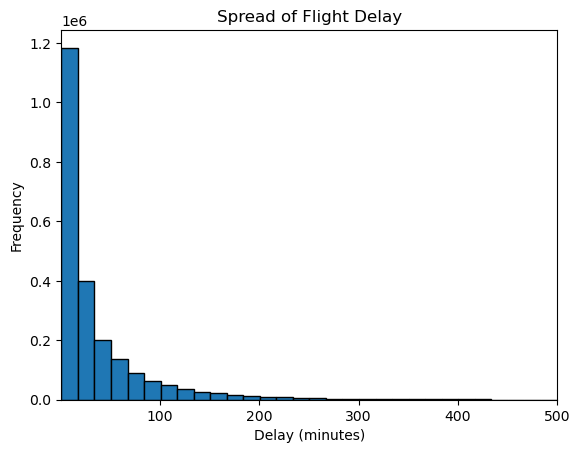

In [8]:
# 'DEP_DELAY_NEW' column
delay_data = df['DEP_DELAY_NEW']

num_bins = 30
bin_range = (1, 500)

plt.hist(delay_data, bins=num_bins, range=bin_range, edgecolor='black')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Spread of Flight Delay')
plt.xlim(bin_range)  # Set the x-axis limits

plt.show()

In [9]:
delay_data.skew()

10.00183019545899

In [10]:
delay_data_transformed = np.log(delay_data + 1)
delay_data_transformed

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
6489057   0.00
6489058   0.00
6489059   0.00
6489060   0.00
6489061   2.83
Name: DEP_DELAY_NEW, Length: 6489062, dtype: float64

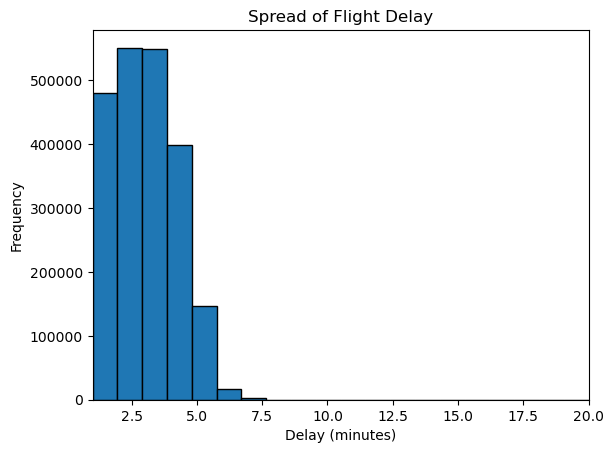

In [11]:
num_bins = 20
bin_range = (1, 20)

plt.hist(delay_data_transformed, bins=num_bins, range=bin_range, edgecolor='black')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Spread of Flight Delay')
plt.xlim(bin_range)  # Set the x-axis limits

plt.show()

#### Here we see that because our data is mainly set at 0 values, we are not able to apply log or square transformations to the data. instead we will bucket values as seen below

</br>

In [24]:
# Conditions and corresponding values
conditions = [
    (df['DEP_DELAY_NEW'] == 0),
    (df['DEP_DELAY_NEW'] <= 15),
    (df['DEP_DELAY_NEW'] > 15)
]
values = ['No Delay', 'Minor Delay', 'Long Delay']

# Create the new column with the assigned values based on conditions
df['Delay Category'] = np.select(conditions, values)

In [25]:
df['Delay Category']

0            No Delay
1            No Delay
2            No Delay
3            No Delay
4            No Delay
              ...    
6489057      No Delay
6489058      No Delay
6489059      No Delay
6489060      No Delay
6489061    Long Delay
Name: Delay Category, Length: 6489062, dtype: object

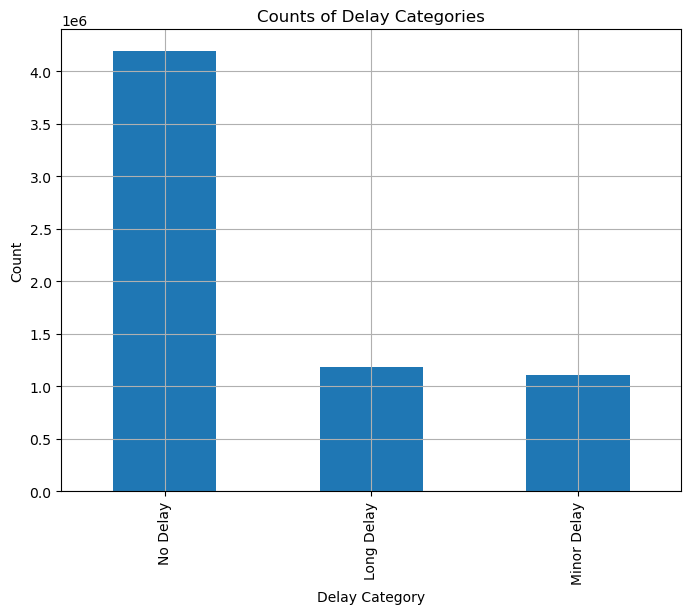

In [26]:
# Count the occurrences of each category
category_counts = df['Delay Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.title('Counts of Delay Categories')
plt.grid(True)
plt.show()

# Independant variable EDA

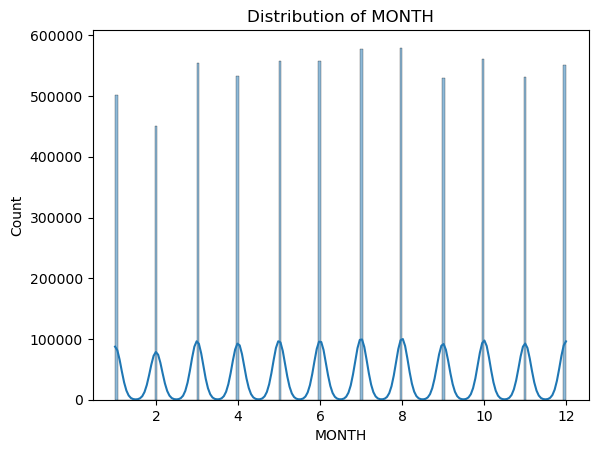

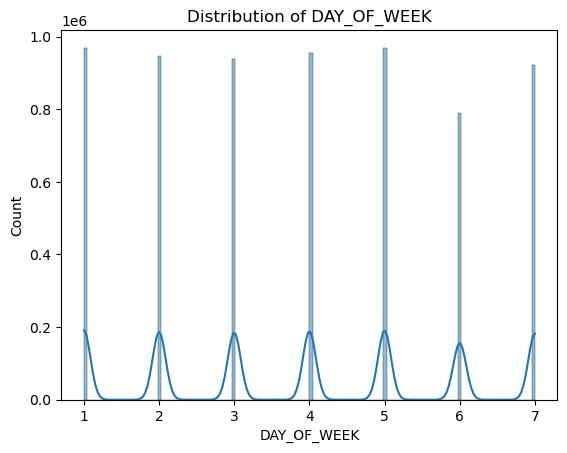

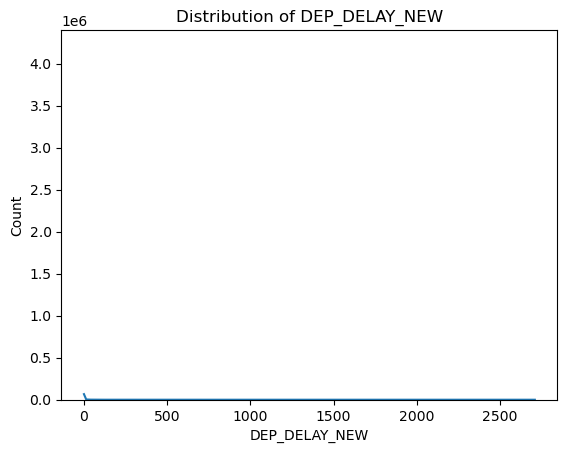

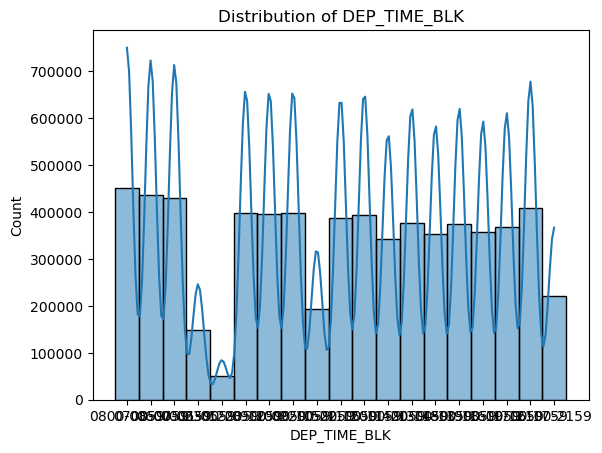

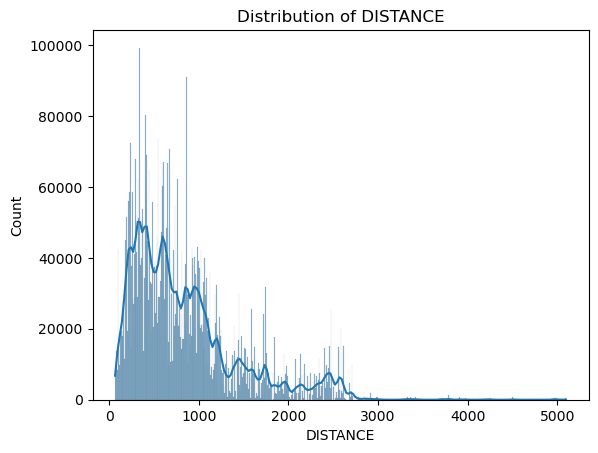

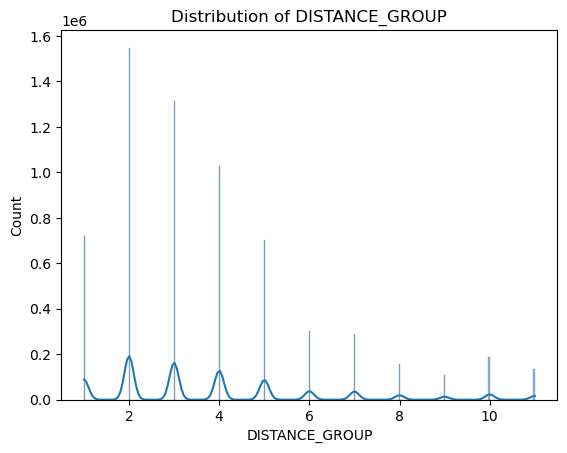

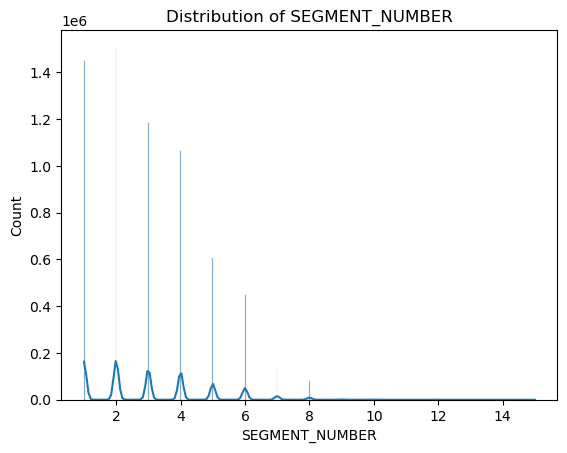

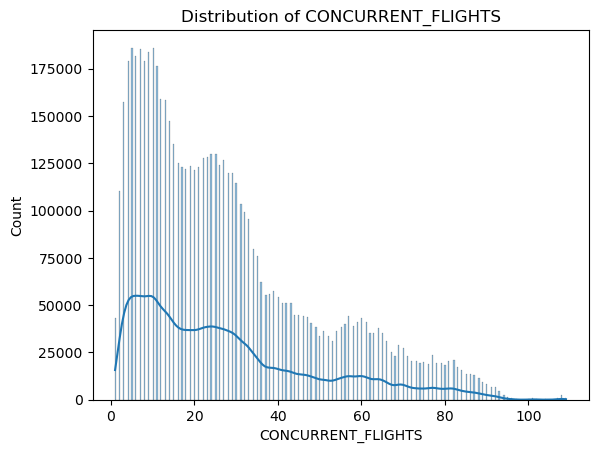

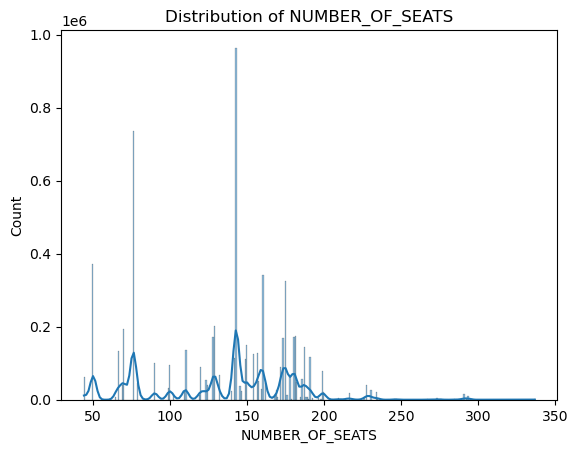

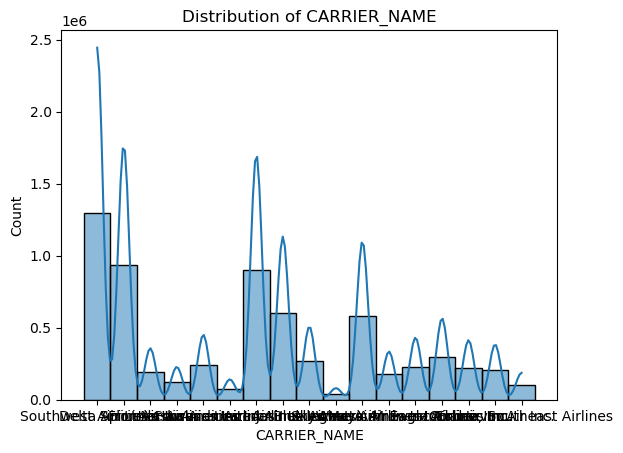

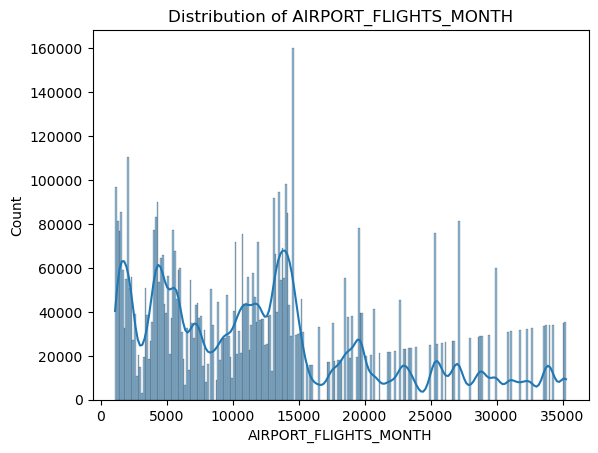

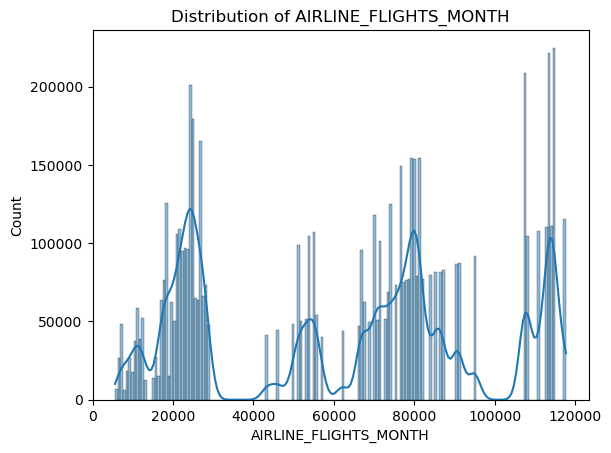

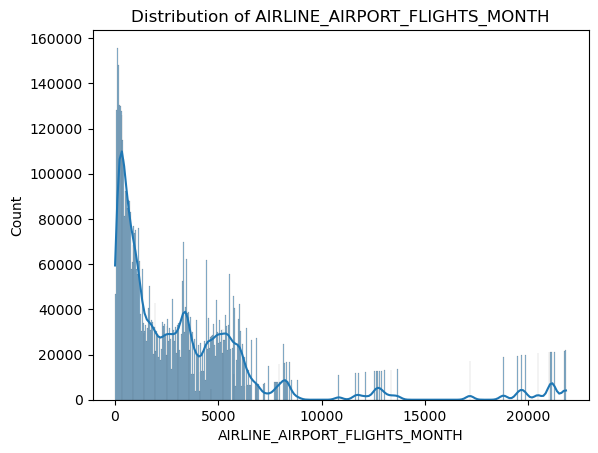

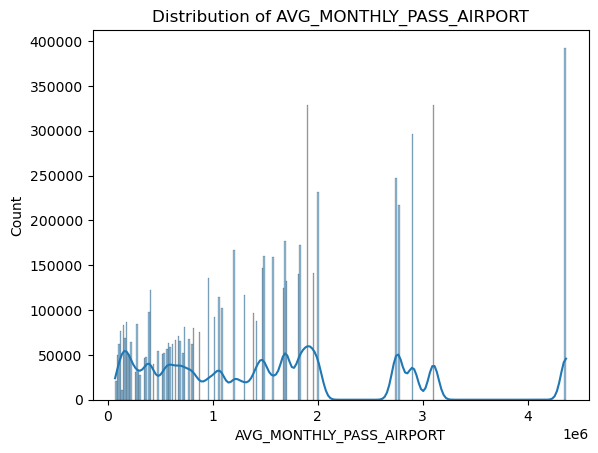

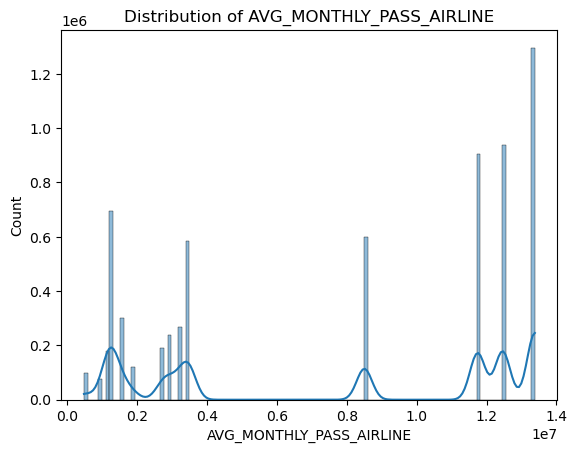

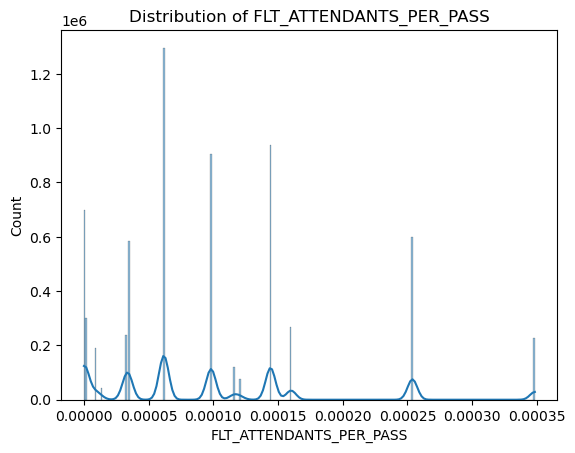

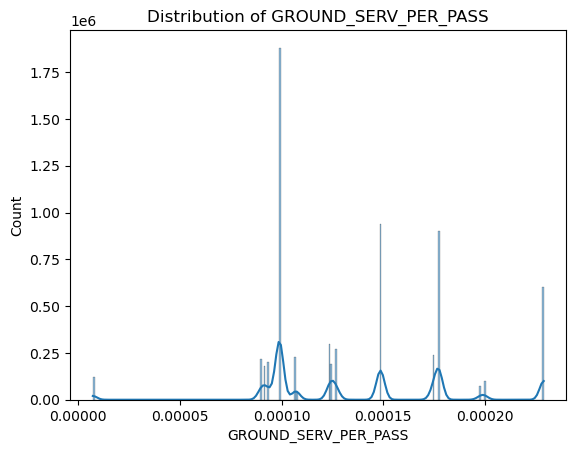

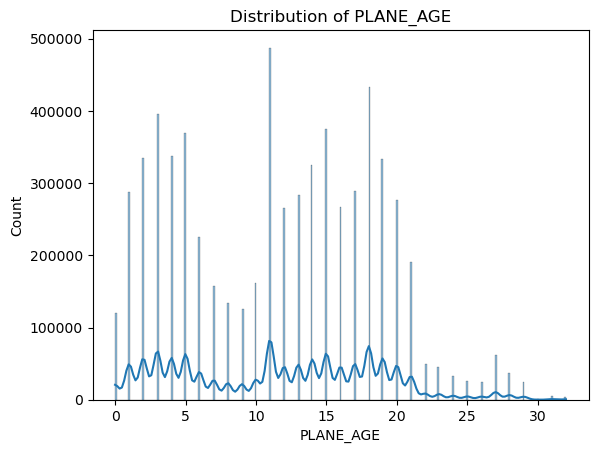

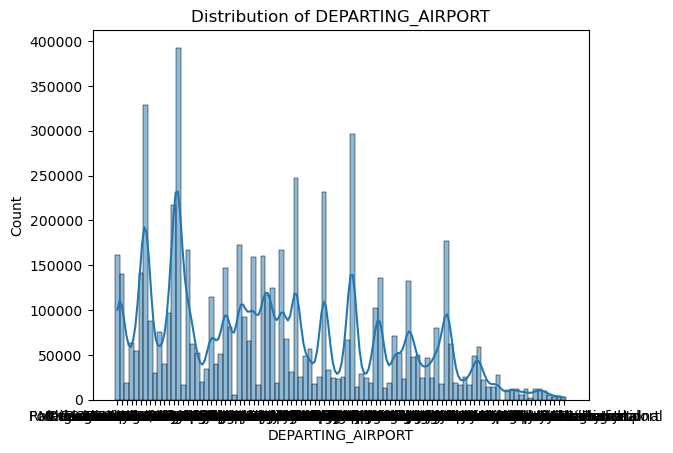

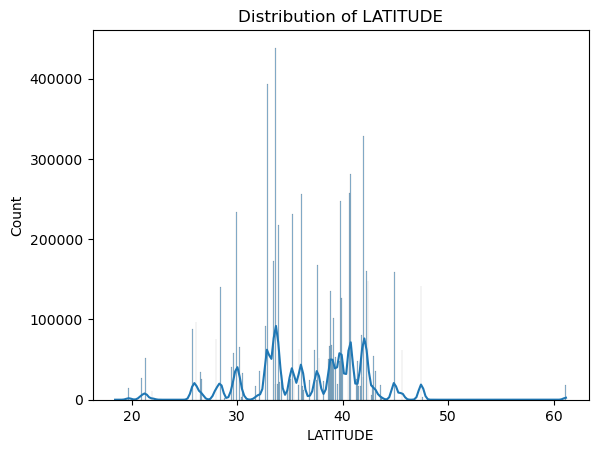

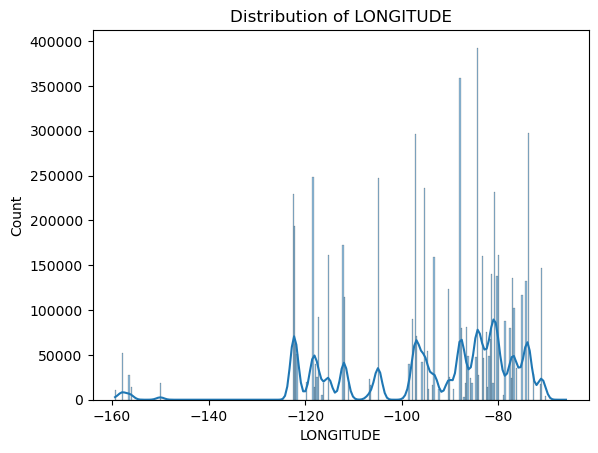

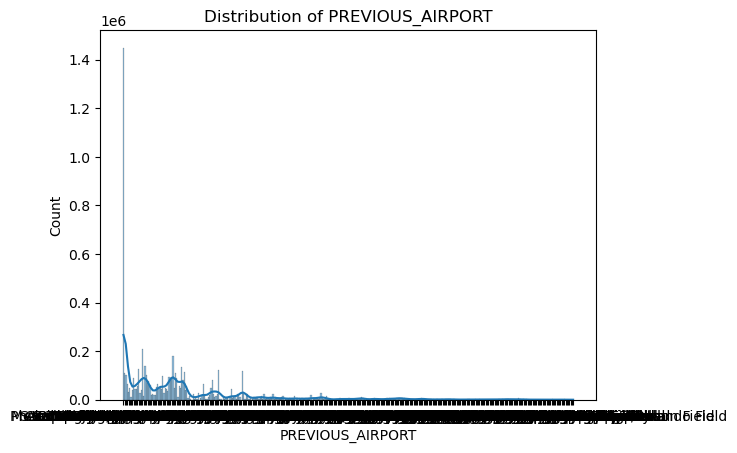

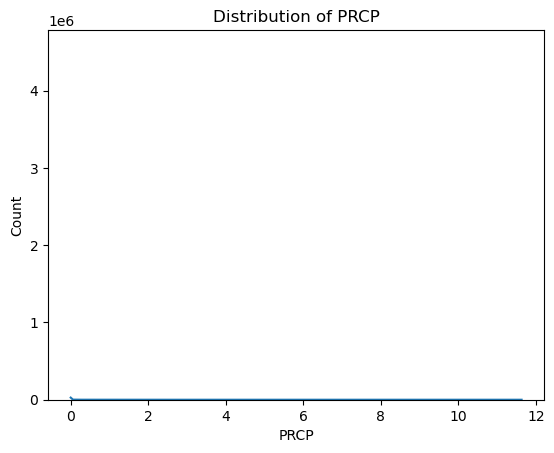

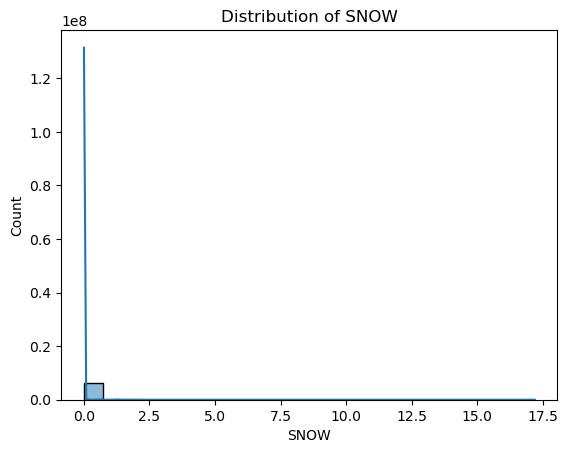

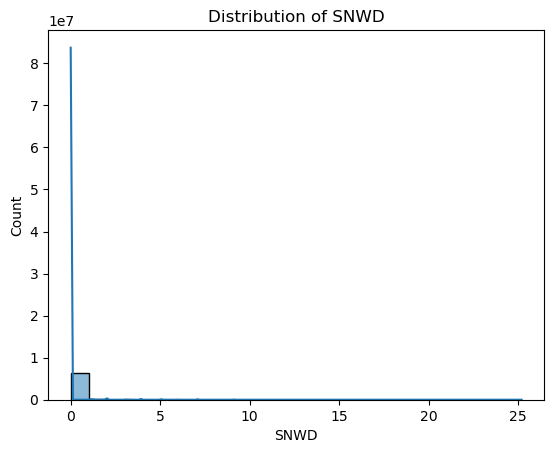

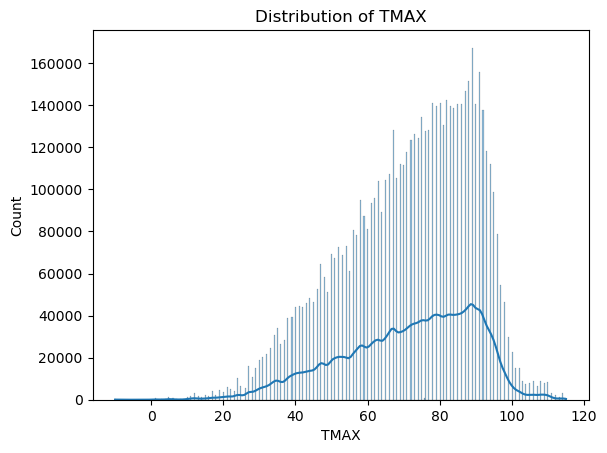

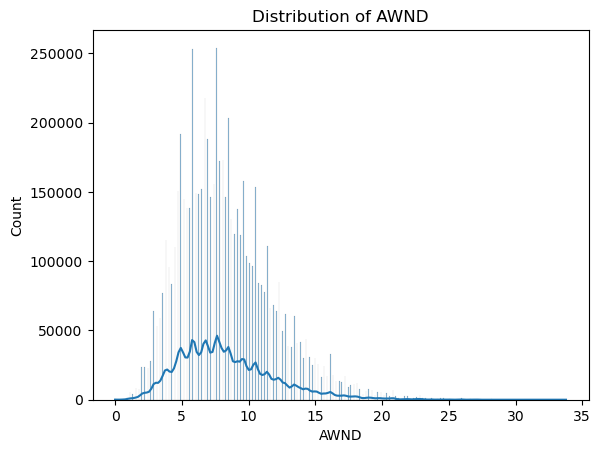

In [115]:
# Get the list of predictor variable names (excluding the target variable)
predictor_columns = [col for col in df.columns if col != 'Delay Category']

# Create plots for each predictor variable
for col in predictor_columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [117]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\three\AppData\Local\Temp\ipykernel_3128\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


MONTH  DAY_OF_WEEK  DEP_DELAY_NEW  DISTANCE  \
MONTH                           1.00         0.01          -0.02     -0.00   
DAY_OF_WEEK                     0.01         1.00          -0.00      0.01   
DEP_DELAY_NEW                  -0.02        -0.00           1.00      0.01   
DISTANCE                       -0.00         0.01           0.01      1.00   
DISTANCE_GROUP                 -0.00         0.01           0.01      0.99   
SEGMENT_NUMBER                  0.02        -0.03           0.04     -0.24   
CONCURRENT_FLIGHTS              0.02        -0.03          -0.00     -0.03   
NUMBER_OF_SEATS                 0.00         0.01          -0.01      0.46   
AIRPORT_FLIGHTS_MONTH           0.04        -0.00           0.01     -0.01   
AIRLINE_FLIGHTS_MONTH           0.04        -0.01          -0.03     -0.00   
AIRLINE_AIRPORT_FLIGHTS_MONTH   0.02        -0.00          -0.01     -0.03   
AVG_MONTHLY_PASS_AIRPORT       -0.00         0.00           0.01      0.04   
AVG_MONTHLY_PASS_AIRLINE       -0.00        -0.00          -0.03      0.13   
FLT_ATTENDANTS_PER_PASS         0.00         0.00           0.00      0.17   
GROUND_SERV_PER_PASS           -0.00         0.00           0.00      0.27   
PLANE_AGE                      -0.02        -0.01           0.01     -0.13   
LATITUDE                        0.01        -0.01           0.01     -0.02   
LONGITUDE                      -0.00        -0.01           0.03     -0.17   
PRCP                           -0.01         0.02           0.08     -0.01   
SNOW                           -0.05        -0.01           0.06     -0.00   
SNWD                           -0.09        -0.01           0.02     -0.01   
TMAX                            0.17         0.01          -0.00      0.00   
AWND                           -0.12         0.00           0.04      0.03   

                               DISTANCE_GROUP  SEGMENT_NUMBER  \
MONTH                                   -0.00            0.02   
DAY_OF_WEEK                              0.01           -0.03   
DEP_DELAY_NEW                            0.01            0.04   
DISTANCE                                 0.99           -0.24   
DISTANCE_GROUP                           1.00           -0.24   
SEGMENT_NUMBER                          -0.24            1.00   
CONCURRENT_FLIGHTS                      -0.04            0.01   
NUMBER_OF_SEATS                          0.45           -0.20   
AIRPORT_FLIGHTS_MONTH                   -0.01            0.04   
AIRLINE_FLIGHTS_MONTH                   -0.00            0.03   
AIRLINE_AIRPORT_FLIGHTS_MONTH           -0.04            0.06   
AVG_MONTHLY_PASS_AIRPORT                 0.04            0.03   
AVG_MONTHLY_PASS_AIRLINE                 0.13           -0.06   
FLT_ATTENDANTS_PER_PASS                  0.17           -0.10   
GROUND_SERV_PER_PASS                     0.27           -0.18   
PLANE_AGE                               -0.14            0.08   
LATITUDE                                -0.01           -0.03   
LONGITUDE                               -0.16           -0.07   
PRCP                                    -0.01           -0.02   
SNOW                                    -0.00           -0.01   
SNWD                                    -0.01           -0.01   
TMAX                                     0.00            0.03   
AWND                                     0.02           -0.02   

                               CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
MONTH                                        0.02             0.00   
DAY_OF_WEEK                                 -0.03             0.01   
DEP_DELAY_NEW                               -0.00            -0.01   
DISTANCE                                    -0.03             0.46   
DISTANCE_GROUP                              -0.04             0.45   
SEGMENT_NUMBER                               0.01            -0.20   
CONCURRENT_FLIGHTS                           1.00            -0.05   
NUMBER_OF_SEATS                      

C:\Users\three\AppData\Local\Temp\ipykernel_3128\1348251164.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')


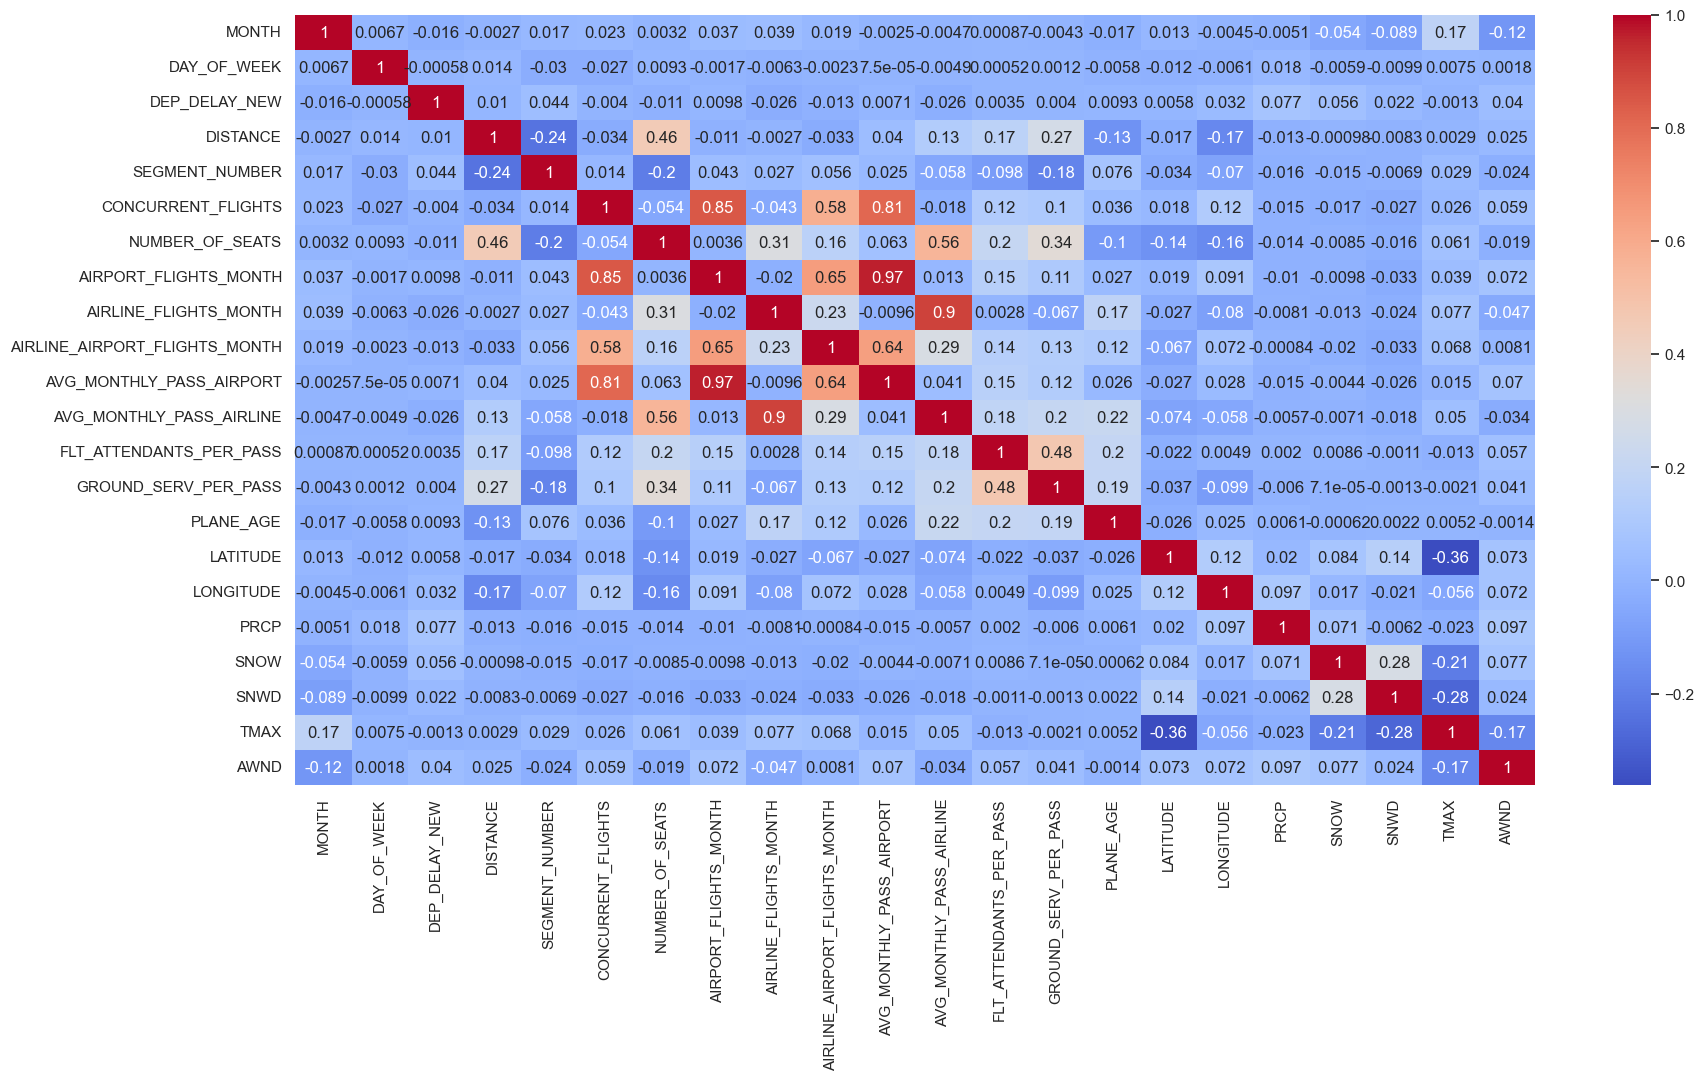

In [121]:
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', context='notebook')
cols = [0, 1, 2]
sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')
plt.show()

#### We can see some colinearity between various independant variables. Instead of dropping variables, we will apply lasso regression in simpler models, as well as use more advanced models to handle this issue.

# Modeling sampling

In [ ]:
# # Define the input features X and target variable y
# X = df[['feature1', 'feature2', ...]]  # Input features
# y = df['Delay Category']  # Target variable

# # Define the class weights
# class_weights = {'Long Delay': 1, 'Minor Delay': 1, 'No Delay': 0.5}

# # Create and fit the logistic regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight=class_weights)
# model.fit(X, y)

# Dealing with NA values

In [27]:
df.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DELAY_NEW                    0
DEP_TIME_BLK                     0
DISTANCE                         0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
Delay Category                   0
dtype: int64

Awesome, the dataset has already been cleaned for us , thanks to *https://www.kaggle.com/code/threnjen/dataset-cleanup-how-the-train-test-sets-were-made*

## Adding Some Additonal Features to the dataset 

#### Below we will add some more features to the dataset, in order to try and capture paterns within the independant variables.

In [29]:
# Calculate the average precipitation for each departing airport
average_precipitation = df.groupby('DEPARTING_AIRPORT')['PRCP'].mean()

# Create a new column to store the average precipitation for each departing airport
df['PRECIPITATION_DEPARTING_AIRPORT_AVG'] = df['DEPARTING_AIRPORT'].map(average_precipitation)

# Create a new column to store the relative precipitation for each airport
df['PRECIPITATION_DEPARTING_AIRPORT_RELATIVE'] = df['PRCP']/ df['PRECIPITATION_DEPARTING_AIRPORT_AVG']

In [30]:
df

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW DEP_TIME_BLK  DISTANCE  \
0            1            7           0.00    0800-0859    258.00   
1            1            7           0.00    0700-0759   1747.00   
2            1            7           0.00    0600-0659   1747.00   
3            1            7           0.00    0600-0659   2248.00   
4            1            7           0.00    0001-0559   1514.00   
...        ...          ...            ...          ...       ...   
6489057     12            7           0.00    2300-2359    102.00   
6489058     12            7           0.00    1800-1859    102.00   
6489059     12            7           0.00    2000-2059    102.00   
6489060     12            7           0.00    2100-2159    102.00   
6489061     12            7          16.00    2100-2159    102.00   

         SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0                     1                  25              143   
1                     1                  29              191   
2                     1                  27              199   
3                     1                  27              180   
4                     1                  10              182   
...                 ...                 ...              ...   
6489057              11                   3              123   
6489058              11                   2              123   
6489059              11                   2              123   
6489060              12                   3              123   
6489061              12                   3              123   

                   CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  LONGITUDE  \
0        Southwest Airlines Co.                  13056  ...    -115.15   
1          Delta Air Lines Inc.                  13056  ...    -115.15   
2          Delta Air Lines Inc.                  13056  ...    -115.15   
3          Delta Air Lines Inc.                  13056  ...    -115.15   
4              Spirit Air Lines                  13056  ...    -115.15   
...                         ...                    ...  ...        ...   
6489057  Hawaiian Airlines Inc.                   1318  ...    -159.35   
6489058  Hawaiian Airlines Inc.                   1318  ...    -159.35   
6489059  Hawaiian Airlines Inc.                   1318  ...    -159.35   
6489060  Hawaiian Airlines Inc.                   1318  ...    -159.35   
6489061  Hawaiian Airlines Inc.                   1318  ...    -159.35   

               PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX  AWND Delay Category  \
0                          NONE  0.00  0.00  0.00 65.00  2.91       No Delay   
1                          NONE  0.00  0.00  0.00 65.00  2.91       No Delay   
2                          NONE  0.00  0.00  0.00 65.00  2.91       No Delay   
3                          NONE  0.00  0.00  0.00 65.00  2.91       No Delay   
4                          NONE  0.00  0.00  0.00 65.00  2.91       No Delay   
...                         ...   ...   ...   ...   ...   ...            ...   
6489057  Honolulu International  0.06  0.00  0.00 84.00 15.21       No Delay   
6489058  Honolulu International  0.06  0.00  0.00 84.00 15.21       No Delay   
6489059  Honolulu International  0.06  0.00  0.00 84.00 15.21       No Delay   
6489060  Honolulu International  0.06  0.00  0.00 84.00 15.21       No Delay   
6489061  Honolulu International  0.06  0.00  0.00 84.00 15.21     Long Delay   

         PRECIPITATION_DEPARTING_AIRPORT_AVG  \
0                                       0.02   
1                                       0.02   
2                                       0.02   
3                                       0.02   
4                                       0.02   
...                                      ...   
6489057                                 0.10   
6489058                                 0.10   
6489059                                 0.10   
6489060                                 0.10   
6489061                          

## Testing LogReg with Minimal Parameters:

In [24]:
from sklearn.linear_model import LogisticRegression

# Define the input features X and target variable y
X = df[['DISTANCE', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'PLANE_AGE', 'PRCP', 'TMAX']]
y = df['Delay Category']  # Target variable

# Define the class weights
class_weights = {'Long Delay': 1, 'Minor Delay': 1, 'No Delay': 0.5}

# Create and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight=class_weights)
model.fit(X, y)

C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={'Long Delay': 1, 'Minor Delay': 1,
                                 'No Delay': 0.5},
                   multi_class='multinomial')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the training data
y_pred = model.predict(X)

# Compute accuracy score
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Compute precision score
precision = precision_score(y, y_pred, average='weighted')
print("Precision:", precision)

# Compute recall score
recall = recall_score(y, y_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 0.6394183011350485


C:\Users\three\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.4567809185701469
Recall: 0.6394183011350485
F1-score: 0.5121346110552751


### Due to the sheer amount of rows, even simple logreg analysis take a long time to compile and run. So instead of looking at all airline data, we will filter for only the top 3 airports that by long delayed flights. 

## Filter df for Only Top 3 Airports by Delays:

In [35]:
flight_counts = df[df['Delay Category'].isin(['Long Delay'])].groupby('DEPARTING_AIRPORT')['DEPARTING_AIRPORT'].count().sort_values(ascending=False)
flight_counts

DEPARTING_AIRPORT
Chicago O'Hare International      72101
Dallas Fort Worth Regional        63504
Atlanta Municipal                 63384
Stapleton International           53631
Douglas Municipal                 43509
                                  ...  
Portland International Jetport      770
Pensacola Regional                  720
Spokane International               441
Sanford NAS                         323
Puerto Rico International            23
Name: DEPARTING_AIRPORT, Length: 96, dtype: int64

In [36]:
selected_airports = ['Chicago O\'Hare International', 'Dallas Fort Worth Regional', 'Atlanta Municipal']
new_df = df[df['DEPARTING_AIRPORT'].isin(selected_airports)]
new_df

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW DEP_TIME_BLK  DISTANCE  \
1541         1            3           0.00    1200-1259    606.00   
1542         1            3         277.00    1000-1059    716.00   
1543         1            3         236.00    0700-0759    258.00   
1544         1            3         139.00    0800-0859    323.00   
1545         1            3          84.00    1000-1059   1437.00   
...        ...          ...            ...          ...       ...   
6448903     12            1          89.00    1900-1959     84.00   
6448904     12            1         110.00    1800-1859    536.00   
6448905     12            1         112.00    1800-1859    303.00   
6448906     12            1           0.00    2200-2259    264.00   
6448907     12            1          48.00    2100-2159    342.00   

         SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
1541                  1                  52               76   
1542                  1                  55               50   
1543                  1                  49               50   
1544                  1                  48               50   
1545                  1                  55               76   
...                 ...                 ...              ...   
6448903               8                  58               50   
6448904               8                  75               50   
6448905               8                  75               44   
6448906               9                  29               50   
6448907               9                  32               50   

                         CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  LONGITUDE  \
1541            SkyWest Airlines Inc.                  23400  ...     -87.91   
1542            SkyWest Airlines Inc.                  23400  ...     -87.91   
1543            SkyWest Airlines Inc.                  23400  ...     -87.91   
1544            SkyWest Airlines Inc.                  23400  ...     -87.91   
1545            SkyWest Airlines Inc.                  23400  ...     -87.91   
...                               ...                    ...  ...        ...   
6448903         SkyWest Airlines Inc.                  27188  ...     -87.91   
6448904         SkyWest Airlines Inc.                  27188  ...     -87.91   
6448905  American Eagle Airlines Inc.                  27188  ...     -87.91   
6448906  American Eagle Airlines Inc.                  27188  ...     -87.91   
6448907         SkyWest Airlines Inc.                  27188  ...     -87.91   

                      PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX  AWND  \
1541                              NONE  0.22  1.00  3.90 34.00  9.84   
1542                              NONE  0.22  1.00  3.90 34.00  9.84   
1543                              NONE  0.22  1.00  3.90 34.00  9.84   
1544                              NONE  0.22  1.00  3.90 34.00  9.84   
1545                              NONE  0.22  1.00  3.90 34.00  9.84   
...                                ...   ...   ...   ...   ...   ...   
6448903                        Kanawha  0.00  0.00  0.00 35.00 10.29   
6448904  Quincy Regional-Baldwin Field  0.00  0.00  0.00 35.00 10.29   
6448905    Indianapolis Muni/Weir Cook  0.00  0.00  0.00 35.00 10.29   
6448906                     Blue Grass  0.00  0.00  0.00 35.00 10.29   
6448907               Barkley Regional  0.00  0.00  0.00 35.00 10.29   

        Delay Category  PRECIPITATION_DEPARTING_AIRPORT_AVG  \
1541          No Delay                                 0.13   
1542        Long Delay                                 0.13   
1543        Long Delay                                 0.13   
1544        Long Delay                                 0.13   
1545        Long Delay                                 0.13   
...                ...                                  ...   
6448903     Long Delay                                 0.13   
6448904     Long Delay                                 0.13   
6448905     Long D

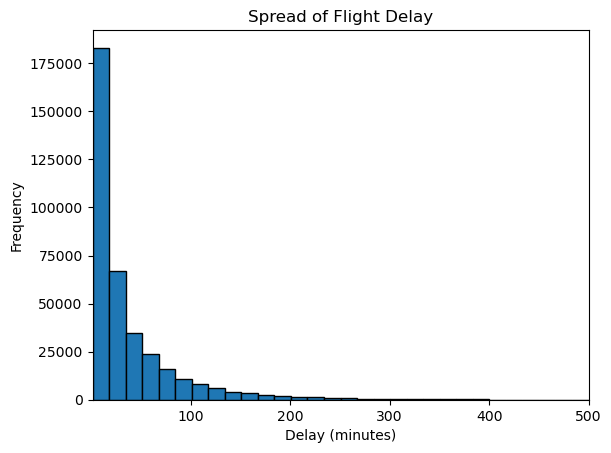

In [37]:
delay_data = new_df['DEP_DELAY_NEW']

num_bins = 30
bin_range = (1, 500)

plt.hist(delay_data, bins=num_bins, range=bin_range, edgecolor='black')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Spread of Flight Delay')
plt.xlim(bin_range)  # Set the x-axis limits

plt.show()

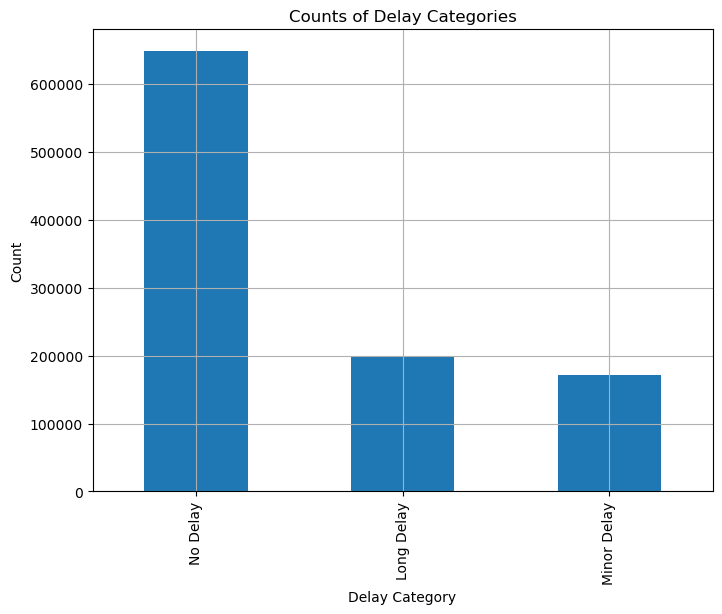

In [38]:
# Count the occurrences of each category
category_counts = new_df['Delay Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.title('Counts of Delay Categories')
plt.grid(True)
plt.show()

## Here we want to get a sub sample, in order to get a better ratio between the delay groups:

In [15]:
# Set the fraction for subsampling 'No delay' category
no_delay_fraction = 0.19

# Subsample 'No delay' category
no_delay_df = new_df[new_df['Delay Category'] == 'No Delay'].sample(frac=no_delay_fraction, random_state=42)

# Subsample the rest of the DataFrame
other_df = new_df[new_df['Delay Category'] != 'No Delay'].sample(frac=0.6, random_state=27)

# Combine the subsampled DataFrames
subsample_df = pd.concat([no_delay_df, other_df])

In [16]:
subsample_df

MONTH  DAY_OF_WEEK  DEP_DELAY_NEW DEP_TIME_BLK  DISTANCE  \
5680782     11            5            0.0    1100-1159     689.0   
6376220     12            6            0.0    1000-1059    1846.0   
6229419     12            4            0.0    1100-1159     214.0   
6164851     12            2            0.0    2000-2059     691.0   
3300280      7            2            0.0    1300-1359    1199.0   
...        ...          ...            ...          ...       ...   
2051019      5            1            1.0    2000-2059     821.0   
6397386     12            6            1.0    1500-1559     259.0   
2505592      5            1            3.0    1000-1059    1590.0   
4694849      9            6           20.0    1400-1459    1121.0   
2344992      5            2           28.0    0900-0959    1199.0   

         SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
5680782               3                  50              157   
6376220               1                  66              160   
6229419               2                  55              180   
6164851               6                  70               79   
3300280               3                  74               76   
...                 ...                 ...              ...   
2051019               3                  88               76   
6397386               4                  79              110   
2505592               2                  82              234   
4694849               3                  64              176   
2344992               2                  84              143   

                         CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  LONGITUDE  \
5680782          Delta Air Lines Inc.                  31151  ...    -84.427   
6376220        American Airlines Inc.                  27188  ...    -87.906   
6229419          Delta Air Lines Inc.                  32251  ...    -84.427   
6164851            Mesa Airlines Inc.                  25322  ...    -97.030   
3300280         Midwest Airline, Inc.                  35086  ...    -84.427   
...                               ...                    ...  ...        ...   
2051019  American Eagle Airlines Inc.                  25360  ...    -97.030   
6397386          Delta Air Lines Inc.                  32251  ...    -84.427   
2505592          Delta Air Lines Inc.                  34238  ...    -84.427   
4694849        American Airlines Inc.                  25530  ...    -97.030   
2344992        Southwest Airlines Co.                  34238  ...    -84.427   

                     PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX   AWND  \
5680782  Raleigh-Durham International  0.01   0.0   0.0  66.0   4.03   
6376220                          NONE  0.00   0.0   0.0  47.0   7.61   
6229419                   Kent County  0.14   0.0   0.0  52.0  12.75   
6164851        Amarillo International  0.00   0.0   0.0  56.0   4.47   
3300280       Stapleton International  0.12   0.0   0.0  92.0   5.14   
...                               ...   ...   ...   ...   ...    ...   
2051019               Robert Gray AAF  0.00   0.0   0.0  89.0  16.55   
6397386       Rochester Monroe County  0.00   0.0   0.0  51.0  10.51   
2505592         Orlando International  0.00   0.0   0.0  74.0  10.51   
4694849    Philadelphia International  0.00   0.0   0.0  97.0   5.14   
2344992    Detroit Metro Wayne County  0.00   0.0   0.0  94.0   7.38   

        Delay Category  PRECIPITATION_DEPARTING_AIRPORT_AVG  \
5680782       No Delay                             0.115208   
6376220       No Delay                             0.128954   
6229419       No Delay                             0.115208   
6164851       No Delay                             0.075448   
3300280       No Delay                             0.115208   
...                ...                                  ...   
2051019    Minor Delay                             0.075448   
6397386    Minor Delay                             0.115208   
2505592    Minor D

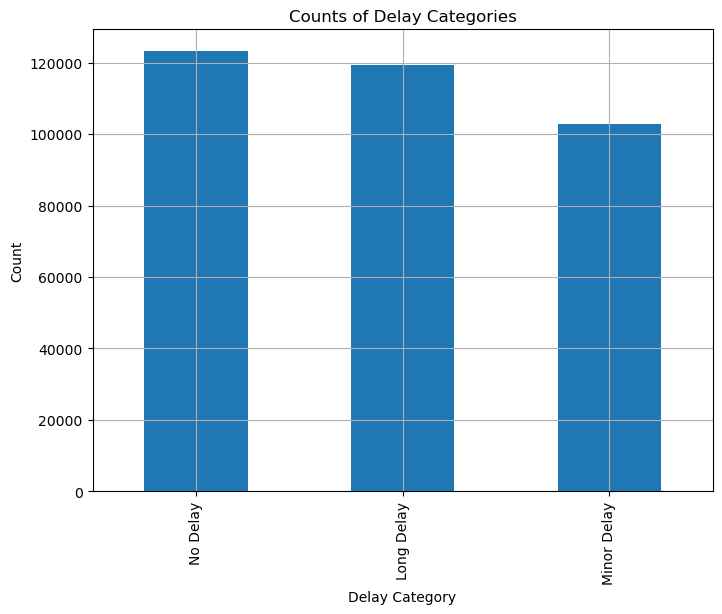

In [17]:
category_counts = subsample_df['Delay Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.title('Counts of Delay Categories')
plt.grid(True)
plt.show()

In [39]:
from sklearn.utils import resample

# Separate the DataFrame based on 'Delay Category'
new_df_no_delay = new_df[new_df['Delay Category'] == 'No Delay']
new_df_minor_delay = new_df[new_df['Delay Category'] == 'Minor Delay']
new_df_long_delay = new_df[new_df['Delay Category'] == 'Long Delay']

# Determine the desired number of samples for each category
num_samples = min(len(new_df_no_delay), len(new_df_minor_delay), len(new_df_long_delay))
num_samples = int(num_samples * 0.6)
print(num_samples)

# Sample the DataFrames to obtain a balanced split
new_df_no_delay_balanced = resample(new_df_no_delay, n_samples=num_samples, replace=False, random_state=42)
new_df_minor_delay_balanced = resample(new_df_minor_delay, n_samples=num_samples, replace=False, random_state=42)
new_df_long_delay_balanced = resample(new_df_long_delay, n_samples=num_samples, replace=False, random_state=42)

# Concatenate the balanced DataFrames to create the final balanced DataFrame
balanced_new_df = pd.concat([new_df_no_delay_balanced, new_df_minor_delay_balanced, new_df_long_delay_balanced])

# Show new_df
balanced_new_df

102751


MONTH  DAY_OF_WEEK  DEP_DELAY_NEW DEP_TIME_BLK  DISTANCE  \
5680782     11            5           0.00    1100-1159    689.00   
6376220     12            6           0.00    1000-1059   1846.00   
6229419     12            4           0.00    1100-1159    214.00   
6164851     12            2           0.00    2000-2059    691.00   
3300280      7            2           0.00    1300-1359   1199.00   
...        ...          ...            ...          ...       ...   
6325773     12            7          90.00    1300-1359    113.00   
1908682      4            7         163.00    1200-1259    689.00   
3292967      7            7          73.00    1900-1959    760.00   
2107710      5            4          35.00    1800-1859    175.00   
3397334      7            2          72.00    1900-1959    612.00   

         SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
5680782               3                  50              157   
6376220               1                  66              160   
6229419               2                  55              180   
6164851               6                  70               79   
3300280               3                  74               76   
...                 ...                 ...              ...   
6325773               1                  33               44   
1908682               2                  63              158   
3292967               2                  84              199   
2107710               6                  71              140   
3397334               3                  59              124   

                         CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  LONGITUDE  \
5680782          Delta Air Lines Inc.                  31151  ...     -84.43   
6376220        American Airlines Inc.                  27188  ...     -87.91   
6229419          Delta Air Lines Inc.                  32251  ...     -84.43   
6164851            Mesa Airlines Inc.                  25322  ...     -97.03   
3300280         Midwest Airline, Inc.                  35086  ...     -84.43   
...                               ...                    ...  ...        ...   
6325773  American Eagle Airlines Inc.                  25322  ...     -97.03   
1908682          Delta Air Lines Inc.                  32678  ...     -84.43   
3292967          Delta Air Lines Inc.                  35086  ...     -84.43   
2107710        American Airlines Inc.                  25360  ...     -97.03   
3397334         United Air Lines Inc.                  29376  ...     -87.91   

                                  PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX  \
5680782               Raleigh-Durham International  0.01  0.00  0.00 66.00   
6376220                                       NONE  0.00  0.00  0.00 47.00   
6229419                                Kent County  0.14  0.00  0.00 52.00   
6164851                     Amarillo International  0.00  0.00  0.00 56.00   
3300280                    Stapleton International  0.12  0.00  0.00 92.00   
...                                            ...   ...   ...   ...   ...   
6325773                                       NONE  0.00  0.00  0.00 56.00   
1908682                      Norfolk International  1.08  0.00  0.00 80.00   
3292967              John F. Kennedy International  0.00  0.00  0.00 89.00   
2107710  Louis Armstrong New Orleans International  0.00  0.00  0.00 87.00   
3397334          Ronald Reagan Washington National  0.05  0.00  0.00 82.00   

         AWND Delay Category  PRECIPITATION_DEPARTING_AIRPORT_AVG  \
5680782  4.03       No Delay                                 0.12   
6376220  7.61       No Delay                                 0.13   
6229419 12.75       No Delay                                 0.12   
6164851  4.47       No Delay                                 0.08   
3300280  5.14       No Delay                                 0.12   
...       ...            ...                                  ...   
6325773 13.42     Long Delay  

In [40]:
# Create a new column to store the relative precipitation for each airport
balanced_new_df['PRECIPITATION_DEPARTING_AIRPORT_RELATIVE'] = balanced_new_df['PRCP'] / balanced_new_df['PRECIPITATION_DEPARTING_AIRPORT_AVG']

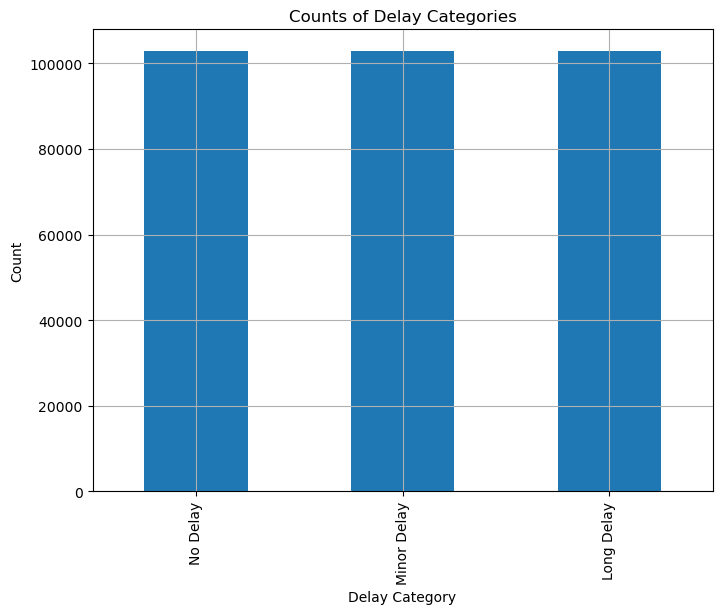

In [41]:
category_counts = balanced_new_df['Delay Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.title('Counts of Delay Categories')
plt.grid(True)
plt.show()

## Lets take a look at the distributions of this new filtered dataframe:

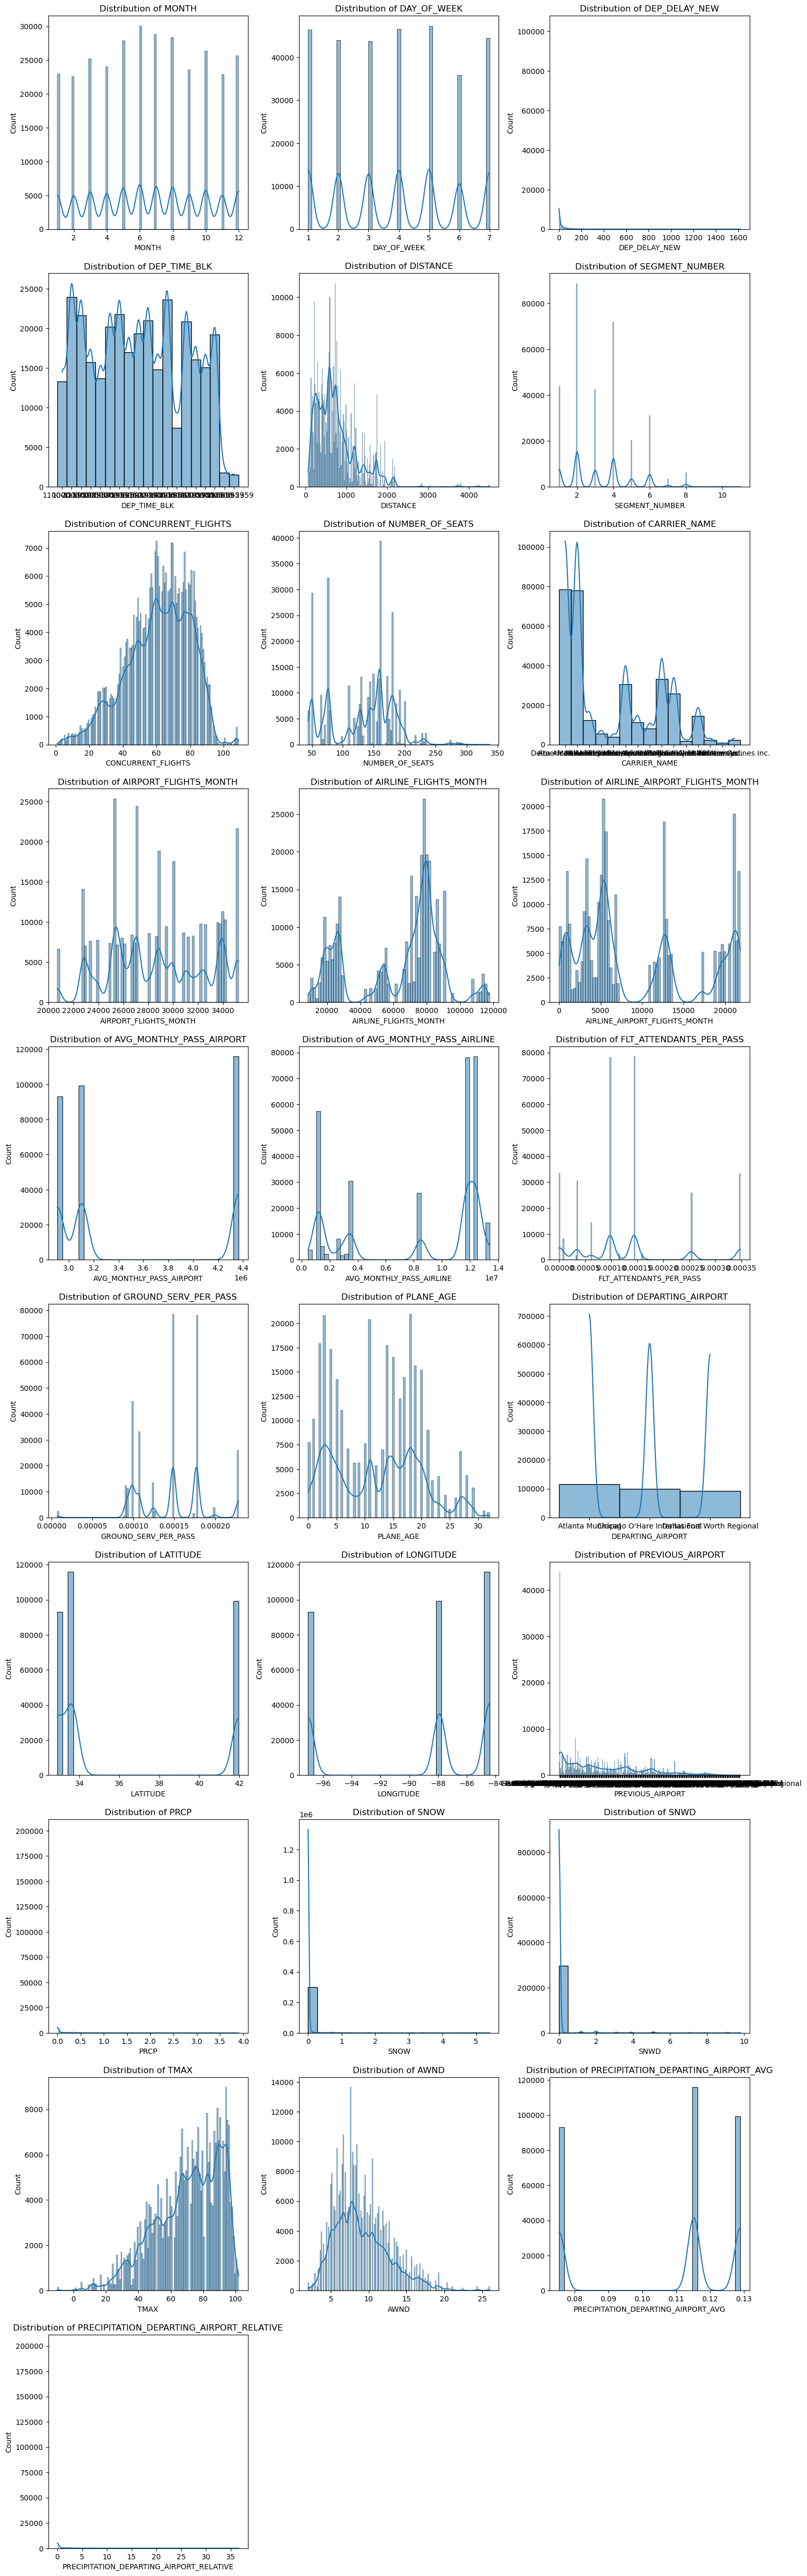

In [19]:
predictor_columns = [col for col in balanced_new_df.columns if col != 'Delay Category']
num_plots = len(predictor_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=4.0)

# Flatten the axes array
axes = axes.flatten()

for i, col in enumerate(predictor_columns):
    ax = axes[i]
    sns.histplot(data=balanced_new_df, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# If there are more subplots than plots, remove the empty subplots
if num_plots < len(axes):
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

plt.show()

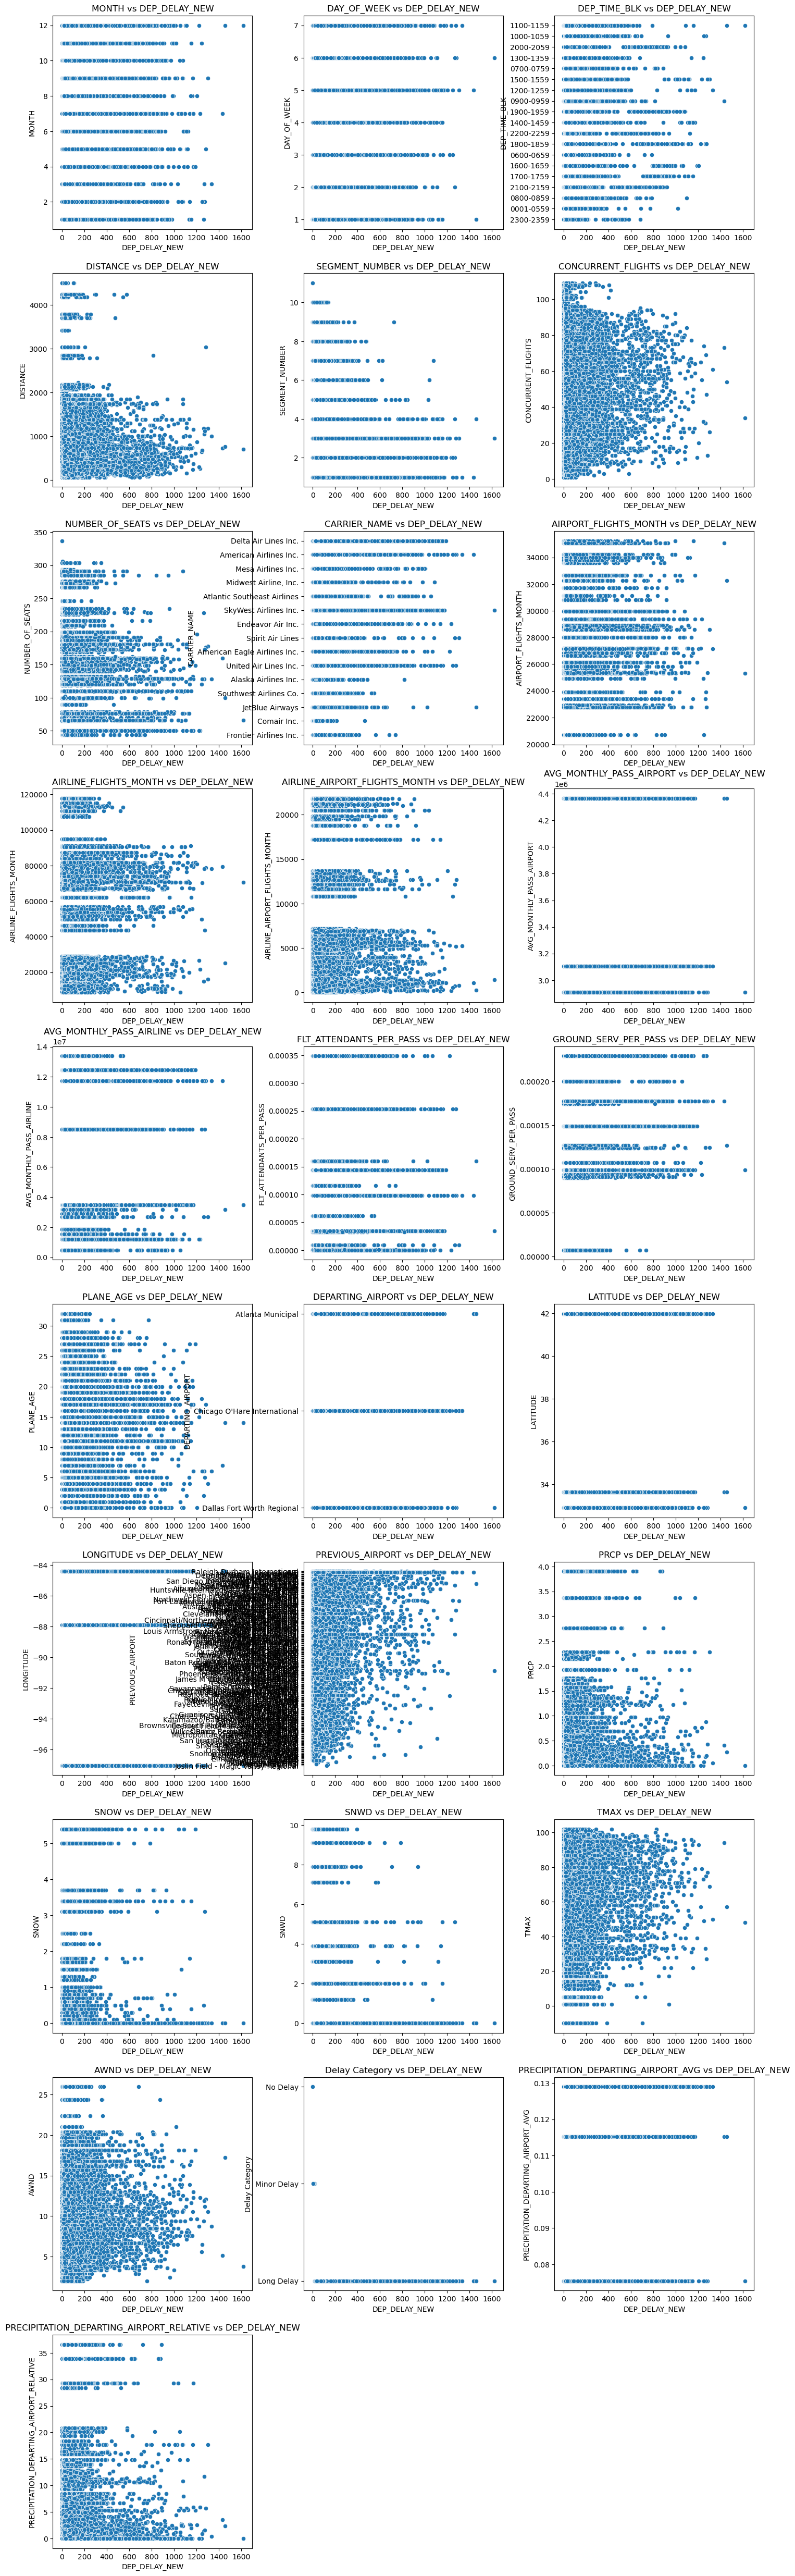

In [18]:
# Get the list of predictor variable names (excluding the target variable)
predictor_columns = [col for col in balanced_new_df.columns if col != 'DEP_DELAY_NEW']

# Create plots for each predictor variable
num_plots = len(predictor_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.tight_layout(pad=4.0)

# Flatten the axes array
axes = axes.flatten()

for i, col in enumerate(predictor_columns):
    ax = axes[i]
    sns.scatterplot(data=balanced_new_df, x='DEP_DELAY_NEW', y=col, ax=ax)
    ax.set_title(f'{col} vs DEP_DELAY_NEW')

# If there are fewer subplots than total plot positions, remove the empty subplots
if num_plots < len(axes):
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

plt.show()

## To get a basic idea of how the bucketed Delays may be interacting with features, lets use the continuous data version of delays ('DEP_DELAY_NEW'), to see how delays correlate with some of the features.

#### Categorical features VS  'DEP_DELAY_NEW':

In [5]:
from scipy.stats import f_oneway

# Select the categorical columns (excluding the target variable)
categorical_columns = [col for col in balanced_new_df.columns if col != 'DEP_DELAY_NEW' and balanced_new_df[col].dtype == 'object']

# Calculate ANOVA for each categorical column
anova_results = {}
for col in categorical_columns:
    groups = []
    for category in balanced_new_df[col].unique():
        groups.append(balanced_new_df[balanced_new_df[col] == category]['DEP_DELAY_NEW'])
    f_statistic, p_value = f_oneway(*groups)
    anova_results[col] = {'F-Statistic': f_statistic, 'P-value': p_value}

# Create a DataFrame from the ANOVA results
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')

# Sort the DataFrame by p-value in ascending order
anova_df.sort_values(by='P-value', inplace=True)

# Print the ANOVA results
print(anova_df)

                    F-Statistic        P-value
DEP_TIME_BLK         165.210931   0.000000e+00
CARRIER_NAME         235.260548   0.000000e+00
DEPARTING_AIRPORT    940.027883   0.000000e+00
Delay Category     65622.213651   0.000000e+00
PREVIOUS_AIRPORT       7.304980  3.508406e-253


Spearman's rank correlation coefficient: This nonparametric measure assesses the monotonic relationship between variables, making it suitable for capturing associations in multimodal distributions and data with high variance. It calculates the correlation based on the ranks of the variables rather than their actual values, making it more robust to outliers and distributional assumptions.

Kendall's rank correlation coefficient: Similar to Spearman's correlation, Kendall's coefficient is also a nonparametric measure that evaluates the monotonic relationship between variables. It quantifies the similarity of the rankings between variables, making it robust to outliers and suitable for multimodal distributions.

In [7]:
# Filter out non-numeric columns
numeric_columns = balanced_new_df.select_dtypes(include='number')

# Calculate correlation matrix for 'DEP_DELAY_NEW' column with numeric columns
corr_matrix_spearman = numeric_columns.corr(method='spearman')['DEP_DELAY_NEW']
corr_matrix_kendall = numeric_columns.corr(method='kendall')['DEP_DELAY_NEW']

# Calculate p-values for each correlation coefficient
p_values_spearman = numeric_columns.apply(lambda x: stats.spearmanr(x, balanced_new_df['DEP_DELAY_NEW'])[1])
p_values_kendall = numeric_columns.apply(lambda x: stats.kendalltau(x, balanced_new_df['DEP_DELAY_NEW'])[1])

# Combine correlation coefficients and p-values into DataFrames
corr_with_p_values_spearman = pd.DataFrame({'Correlation (Spearman)': corr_matrix_spearman, 'P-value (Spearman)': p_values_spearman})
corr_with_p_values_kendall = pd.DataFrame({'Correlation (Kendall)': corr_matrix_kendall, 'P-value (Kendall)': p_values_kendall})

# Sort the DataFrames by absolute correlation values
sorted_corr_with_p_values_spearman = corr_with_p_values_spearman.iloc[1:].sort_values(by='Correlation (Spearman)', ascending=False)
sorted_corr_with_p_values_kendall = corr_with_p_values_kendall.iloc[1:].sort_values(by='Correlation (Kendall)', ascending=False)

# Create a combined DataFrame to display the correlation tables
combined_df = pd.concat([sorted_corr_with_p_values_spearman, sorted_corr_with_p_values_kendall], axis=1)

# Reduce significant figures to three decimal places
combined_df['Correlation (Spearman)'] = combined_df['Correlation (Spearman)'].apply(lambda x: round(x, 3))
combined_df['P-value (Spearman)'] = combined_df['P-value (Spearman)'].apply(lambda x: round(x, 3))
combined_df['Correlation (Kendall)'] = combined_df['Correlation (Kendall)'].apply(lambda x: round(x, 3))
combined_df['P-value (Kendall)'] = combined_df['P-value (Kendall)'].apply(lambda x: round(x, 3))

# Print the combined correlation table
print("Combined Correlation Table:")
combined_df

C:\Users\three\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5283: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\three\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5283: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Combined Correlation Table:


Correlation (Spearman)  \
DEP_DELAY_NEW                                              1.000   
PRECIPITATION_DEPARTING_AIRPORT_RELATIVE                   0.169   
PRCP                                                       0.168   
SNOW                                                       0.086   
SEGMENT_NUMBER                                             0.077   
AWND                                                       0.066   
DISTANCE                                                   0.058   
SNWD                                                       0.058   
GROUND_SERV_PER_PASS                                       0.043   
NUMBER_OF_SEATS                                            0.039   
DAY_OF_WEEK                                                0.010   
LATITUDE                                                   0.007   
PRECIPITATION_DEPARTING_AIRPORT_AVG                        0.007   
AIRLINE_FLIGHTS_MONTH                                      0.003   
TMAX                                                      -0.003   
PLANE_AGE                                                 -0.007   
AVG_MONTHLY_PASS_AIRLINE                                  -0.009   
AIRLINE_AIRPORT_FLIGHTS_MONTH                             -0.025   
CONCURRENT_FLIGHTS                                        -0.034   
FLT_ATTENDANTS_PER_PASS                                   -0.053   
AIRPORT_FLIGHTS_MONTH                                     -0.054   
AVG_MONTHLY_PASS_AIRPORT                                  -0.068   
LONGITUDE                                                 -0.068   

                                          P-value (Spearman)  \
DEP_DELAY_NEW                                          0.000   
PRECIPITATION_DEPARTING_AIRPORT_RELATIVE               0.000   
PRCP                                                   0.000   
SNOW                                                   0.000   
SEGMENT_NUMBER                                         0.000   
AWND                                                   0.000   
DISTANCE                                               0.000   
SNWD                                                   0.000   
GROUND_SERV_PER_PASS                                   0.000   
NUMBER_OF_SEATS                                        0.000   
DAY_OF_WEEK                                            0.000   
LATITUDE                                               0.000   
PRECIPITATION_DEPARTING_AIRPORT_AVG                    0.000   
AIRLINE_FLIGHTS_MONTH                                  0.069   
TMAX                                                   0.077   
PLANE_AGE                                              0.000   
AVG_MONTHLY_PASS_AIRLINE                               0.000   
AIRLINE_AIRPORT_FLIGHTS_MONTH                          0.000   
CONCURRENT_FLIGHTS                                     0.000   
FLT_ATTENDANTS_PER_PASS                                0.000   
AIRPORT_FLIGHTS_MONTH                                  0.000   
AVG_MONTHLY_PASS_AIRPORT                               0.000   
LONGITUDE                                              0.000   

                                          Correlation (Kendall)  \
DEP_DELAY_NEW                                             1.000   
PRECIPITATION_DEPARTING_AIRPORT_RELATIVE                  0.132   
PRCP                                                      0.132   
SNOW                                                      0.073   
SEGMENT_NUMBER                                            0.060   
AWND                                                      0.046   
DISTANCE                                                  0.041   
SNWD                                                      0.049   
GROUND_SERV_PER_PASS                                      0.033   
NUMBER_OF_SEATS                                           0.028   
DAY_OF_WEEK                                               0.008   
LATITUDE                                                  0.005   
P

As most of our features are non-normal in distribution we will use Kruskal-Wallis H and Cramer's V tests.

Kruskal-Wallis H test assesses the differences in medians among the categories of the target variable, while Cramer's V measures the strength of the association.

Kruskal-Wallis H Test: The Kruskal-Wallis H test focuses on the median differences among groups and determines if these differences are statistically significant. It does not provide a measure of effect size but rather assesses if the groups are different.

Combining these two test allows us to gett a better idea of the significance and magnitute features have on the 'Delay Category'

In [3]:
# Filter out non-numeric columns
numeric_columns = balanced_new_df.select_dtypes(include='number')

# Select the categorical target column
categorical_target = balanced_new_df['Delay Category']

# Perform Kruskal-Wallis H test for each numeric column
results = []
for column in numeric_columns.columns:
    groups = []
    for category in categorical_target.unique():
        groups.append(numeric_columns[column][categorical_target == category])
    h, p_value = kruskal(*groups)
    results.append((column, h, p_value))

# Create DataFrame to store the Kruskal-Wallis H test results
result_df = pd.DataFrame(results, columns=['Column', 'Kruskal-Wallis H', 'P-value'])

# Sort the DataFrame by the Kruskal-Wallis H test statistic
result_df.sort_values(by='Kruskal-Wallis H', ascending=False, inplace=True)

# Reduce significant figures to three decimal places
result_df['Kruskal-Wallis H'] = result_df['Kruskal-Wallis H'].apply(lambda x: round(x, 3))
result_df['P-value'] = result_df['P-value'].apply(lambda x: round(x, 3))

# Print the results
print("Kruskal-Wallis H Test Results:")
result_df

Kruskal-Wallis H Test Results:


Column  Kruskal-Wallis H  P-value
2                              DEP_DELAY_NEW        284619.725      0.0
23  PRECIPITATION_DEPARTING_AIRPORT_RELATIVE          7758.063      0.0
17                                      PRCP          7698.483      0.0
6                            NUMBER_OF_SEATS          6354.897      0.0
11                  AVG_MONTHLY_PASS_AIRLINE          4721.912      0.0
8                      AIRLINE_FLIGHTS_MONTH          4130.558      0.0
3                                   DISTANCE          3344.458      0.0
9              AIRLINE_AIRPORT_FLIGHTS_MONTH          1965.967      0.0
18                                      SNOW          1917.063      0.0
4                             SEGMENT_NUMBER          1859.072      0.0
13                      GROUND_SERV_PER_PASS          1688.841      0.0
16                                 LONGITUDE          1375.243      0.0
10                  AVG_MONTHLY_PASS_AIRPORT          1375.243      0.0
21                                      AWND          1203.996      0.0
7                      AIRPORT_FLIGHTS_MONTH           890.859      0.0
19                                      SNWD           863.781      0.0
12                   FLT_ATTENDANTS_PER_PASS           729.320      0.0
5                         CONCURRENT_FLIGHTS           612.103      0.0
15                                  LATITUDE           571.910      0.0
22       PRECIPITATION_DEPARTING_AIRPORT_AVG           571.910      0.0
0                                      MONTH           517.447      0.0
14                                 PLANE_AGE           182.186      0.0
1                                DAY_OF_WEEK            39.134      0.0
20                                      TMAX            16.578      0.0

In [5]:
balanced_new_df.isna().sum()

MONTH                                       0
DAY_OF_WEEK                                 0
DEP_DELAY_NEW                               0
DEP_TIME_BLK                                0
DISTANCE                                    0
SEGMENT_NUMBER                              0
CONCURRENT_FLIGHTS                          0
NUMBER_OF_SEATS                             0
CARRIER_NAME                                0
AIRPORT_FLIGHTS_MONTH                       0
AIRLINE_FLIGHTS_MONTH                       0
AIRLINE_AIRPORT_FLIGHTS_MONTH               0
AVG_MONTHLY_PASS_AIRPORT                    0
AVG_MONTHLY_PASS_AIRLINE                    0
FLT_ATTENDANTS_PER_PASS                     0
GROUND_SERV_PER_PASS                        0
PLANE_AGE                                   0
DEPARTING_AIRPORT                           0
LATITUDE                                    0
LONGITUDE                                   0
PREVIOUS_AIRPORT                            0
PRCP                              

### *\**\**Save the df for Later Use:*\**\**

In [14]:
# Save the DataFrame to a file
with open('old_flight_df.pickle', 'wb') as file:
    pickle.dump(df, file)

In [44]:
# Save the DataFrame to a file
with open('flight_df.pickle', 'wb') as file:
    pickle.dump(balanced_new_df, file)

In [2]:
# Load the DataFrame from the file
with open('flight_df.pickle', 'rb') as file:
    balanced_new_df = pickle.load(file)

In [36]:
balanced_new_df.shape

(308253, 29)